# Analyze Data

## Prepare

### Import thư viện cần thiết

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import calendar

from matplotlib.dates import DateFormatter
from wordcloud import WordCloud
from pyvi import ViTokenizer
from collections import Counter

### Đọc dữ liệu

In [117]:
path="D:\data_crawl\datavitaminmeomeomeo.npy"
post_list = np.load(path,allow_pickle=True)
df = pd.read_excel('Data\cleandatavitaminmeomeomeo.xlsx')

## Post


### Tổng quan

#### Các bài đăng

In [112]:
post_df_full=df
post_df_full

,post_id,text,post_text,time,timestamp,image,image_lowquality,images,images_description,images_lowquality,...,page_id,image_id,image_ids,video_ids,videos,was_live,fetched_time,datetime,hour,date
0,322538797196682,Trừi đánh tránh bữa ăn mà trừi 🥹,Trừi đánh tránh bữa ăn mà trừi 🥹,2023-11-22 16:26:57,1700645217,https://scontent.fhan14-3.fna.fbcdn.net/v/t39....,https://scontent.fhan14-3.fna.fbcdn.net/v/t39....,['https://scontent.fhan14-3.fna.fbcdn.net/v/t3...,"['Có thể là hình ảnh về động vật', 'Có thể là ...",['https://scontent.fhan14-3.fna.fbcdn.net/v/t3...,...,100331869342491,NaN,[],[],[],False,2023-11-22 22:58:56.519,2023-11-22 16:26:57,16,2023-11-22
1,322086103908618,Bàn cào tuy mới mà cũ tuy cũ mà mới 🥹,Bàn cào tuy mới mà cũ tuy cũ mà mới 🥹,2023-11-21 18:15:47,1700565347,NaN,https://scontent.fhan14-2.fna.fbcdn.net/v/t15....,[],[],['https://scontent.fhan14-2.fna.fbcdn.net/v/t1...,...,100331869342491,NaN,[],NaN,NaN,False,2023-11-22 22:59:44.922,2023-11-21 18:15:47,18,2023-11-21
2,321592323957996,1 ngày tòn là màu xanh\n\n#pateHappyChoice,1 ngày tòn là màu xanh\n\n#pateHappyChoice,2023-11-20 19:19:51,1700482791,NaN,https://scontent.fhan14-4.fna.fbcdn.net/v/t15....,[],[],['https://scontent.fhan14-4.fna.fbcdn.net/v/t1...,...,100331869342491,NaN,[],NaN,NaN,False,2023-11-22 23:00:40.981,2023-11-20 19:19:51,19,2023-11-20
3,320907017359860,Tụ này mà dề thăm trường 20/11 người ta tưởng ...,Tụ này mà dề thăm trường 20/11 người ta tưởng ...,2023-11-19 12:20:44,1700371244,NaN,https://scontent.fhan14-3.fna.fbcdn.net/v/t15....,[],[],['https://scontent.fhan14-3.fna.fbcdn.net/v/t1...,...,100331869342491,NaN,[],NaN,NaN,False,2023-11-22 23:01:27.609,2023-11-19 12:20:44,12,2023-11-19
4,320580924059136,Trước và sau khi thằng Mập đi họp phụ huynh ch...,Trước và sau khi thằng Mập đi họp phụ huynh ch...,2023-11-18 21:44:24,1700318664,https://scontent.fhan14-4.fna.fbcdn.net/v/t39....,https://scontent.fhan14-4.fna.fbcdn.net/v/t39....,['https://scontent.fhan14-4.fna.fbcdn.net/v/t3...,"['Có thể là hình ảnh về mèo', 'Có thể là hình ...",['https://scontent.fhan14-4.fna.fbcdn.net/v/t3...,...,100331869342491,NaN,[],[],[],False,2023-11-22 23:03:05.349,2023-11-18 21:44:24,21,2023-11-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,260254546758441,Nỗi lòng chị Diệu,Nỗi lòng chị Diệu,2023-07-30 17:05:00,1690736700,NaN,https://scontent.fhan14-4.fna.fbcdn.net/v/t15....,[],[],['https://scontent.fhan14-4.fna.fbcdn.net/v/t1...,...,100331869342491,NaN,[],NaN,NaN,False,2023-11-23 00:22:15.107,2023-07-30 17:05:00,17,2023-07-30
96,258198343630728,Một ngày ăn dì của mấy con 🐴,Một ngày ăn dì của mấy con 🐴,2023-07-26 19:07:00,1690398420,NaN,https://scontent.fhan14-3.fna.fbcdn.net/v/t15....,[],[],['https://scontent.fhan14-3.fna.fbcdn.net/v/t1...,...,100331869342491,NaN,[],NaN,NaN,False,2023-11-23 00:23:55.839,2023-07-26 19:07:00,19,2023-07-26
97,257730417010854,Hành trình đi tìm kho báu của Mỹ Diệu 🥲,Hành trình đi tìm kho báu của Mỹ Diệu 🥲,2023-07-25 20:00:00,1690315200,https://scontent.fhan14-3.fna.fbcdn.net/v/t39....,https://scontent.fhan14-3.fna.fbcdn.net/v/t39....,['https://scontent.fhan14-3.fna.fbcdn.net/v/t3...,"['Không có mô tả ảnh.', 'Không có mô tả ảnh.',...",['https://scontent.fhan14-3.fna.fbcdn.net/v/t3...,...,100331869342491,NaN,[],[],[],False,2023-11-23 00:24:32.986,2023-07-25 20:00:00,20,2023-07-25
98,257152647068631,Chú 7 thả dáng,Chú 7 thả dáng,2023-07-24 15:14:00,1690211640,https://scontent.fhan14-2.fna.fbcdn.net/v/t39....,https://scontent.fhan14-2.fna.fbcdn.net/v/t39....,['https://scontent.fhan14-2.fna.fbcdn.net/v/t3...,"['Không có mô tả ảnh.', 'Không có mô tả ảnh.',...",['https://scontent.fhan14-2.fna.fbcdn.net/v/t3...,...,100331869342491,NaN,[],[],[],False,2023-11-23 00:24:57.417,2023-07-24 15:14:00,15,2023-07-24


#### Tổng số bài đăng phân tích

In [55]:
print ('Tổng số bài đăng phân tích :', len(df))

Tổng số bài đăng phân tích : 100


### Thời gian đăng bài

#### Số bài đăng theo ngày

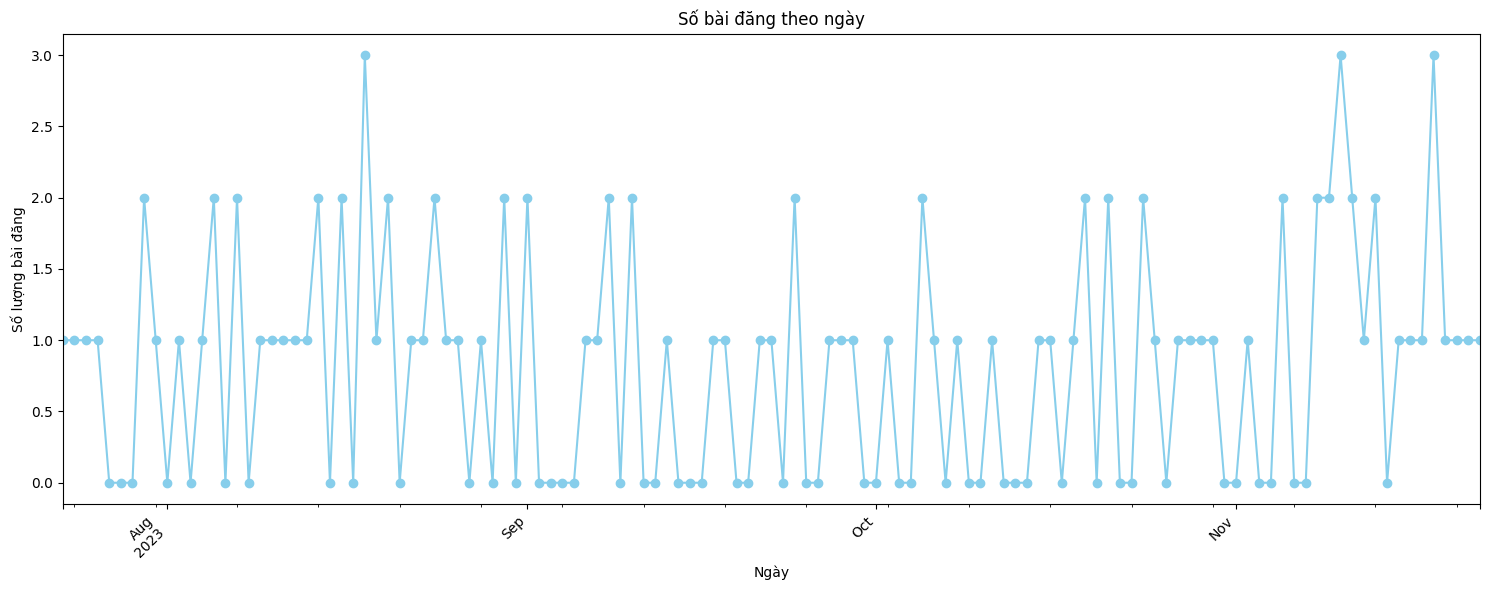

In [85]:
# Tính số lượng bài đăng theo ngày
post_count_by_date = df.groupby('date')['post_id'].count()

# Tạo một Series với toàn bộ dải ngày và giá trị là 0
all_dates = pd.date_range(start=post_count_by_date.index.min(), end=post_count_by_date.index.max(), freq='D')
post_count_by_date_all = pd.Series(0, index=all_dates)

# Cập nhật giá trị của những ngày có dữ liệu
post_count_by_date_all.update(post_count_by_date)

# Vẽ biểu đồ đường
plt.figure(figsize=(15, 6))
line_plot = post_count_by_date_all.plot(kind='line', marker='o', color='skyblue')
plt.title('Số bài đăng theo ngày')
plt.xlabel('Ngày')
plt.ylabel('Số lượng bài đăng')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Số bài đăng theo giờ

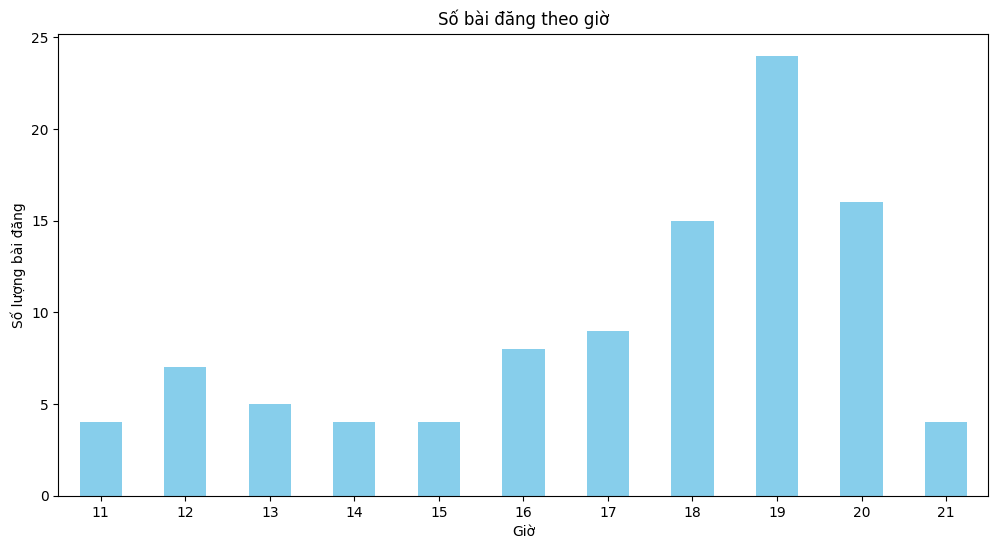

In [64]:
# Tính số lượng bài đăng theo giờ
post_count_by_hour = df.groupby('hour')['post_id'].count()

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
post_count_by_hour.plot(kind='bar', color='skyblue')
plt.title('Số bài đăng theo giờ')
plt.xlabel('Giờ')
plt.ylabel('Số lượng bài đăng')
plt.xticks(rotation=0)
plt.show()

#### Số bài đăng theo thứ trong tuần

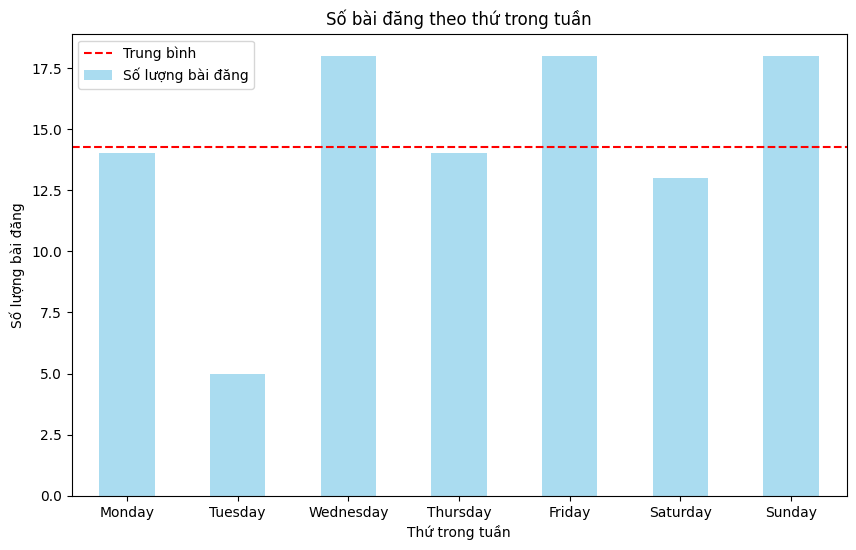

In [158]:
# Chuyển cột 'date' sang định dạng datetime
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
df['weekday'] = df['date'].dt.dayofweek

# Sắp xếp theo thứ tự ngày trong tuần
post_count_by_weekday = df.groupby('weekday')['post_id'].count()

# Chuyển cột 'weekday' thành kiểu category với thứ tự mong muốn
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['weekday'] = pd.Categorical(df['weekday'].apply(lambda x: calendar.day_name[x]), categories=weekday_order, ordered=True)

# Sắp xếp lại DataFrame theo thứ tự ngày trong tuần
df = df.sort_values('weekday')

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
bar_plot = df['weekday'].value_counts().sort_index().plot(kind='bar', color='skyblue', alpha=0.7, label='Số lượng bài đăng')

# Thêm đường trung bình
mean_line = df['weekday'].value_counts().sort_index().mean()
plt.axhline(y=mean_line, color='red', linestyle='--', label='Trung bình')

plt.title('Số bài đăng theo thứ trong tuần')
plt.xlabel('Thứ trong tuần')
plt.ylabel('Số lượng bài đăng')
plt.xticks(rotation=0)
plt.legend()
plt.show()

### Loại bài đăng (ảnh, video)

#### Số bài đăng mỗi loại:

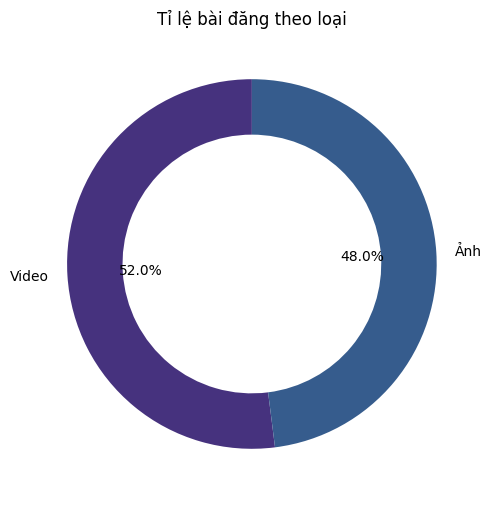

In [98]:
df['post_type'] = df.apply(lambda row: 'Video' if not pd.isna(row['video']) else 'Ảnh' if not pd.isna(row['images']) else 'Khác', axis=1)
post_type_counts = df['post_type'].value_counts()

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.pie(post_type_counts, labels=post_type_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'), wedgeprops=dict(width=0.3))

plt.title('Tỉ lệ bài đăng theo loại')
plt.show()

#### Số lượng bài đăng loại ảnh và video theo ngày

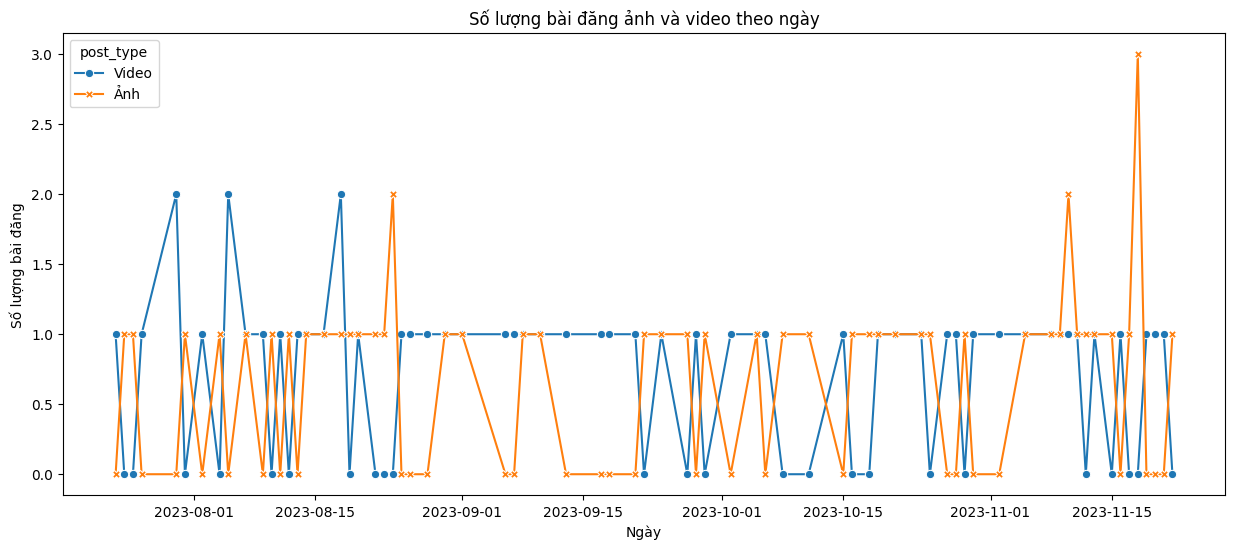

In [88]:
post_type_by_date = df.groupby(['date', 'post_type']).size().unstack(fill_value=0)

# Vẽ biểu đồ
plt.figure(figsize=(15, 6))
sns.lineplot(data=post_type_by_date, markers=True, dashes=False)
plt.title('Số lượng bài đăng ảnh và video theo ngày')
plt.xlabel('Ngày')
plt.ylabel('Số lượng bài đăng')
plt.show()

### Key words trong bài đăng

#### Từ khóa xuất hiện nhiều nhất

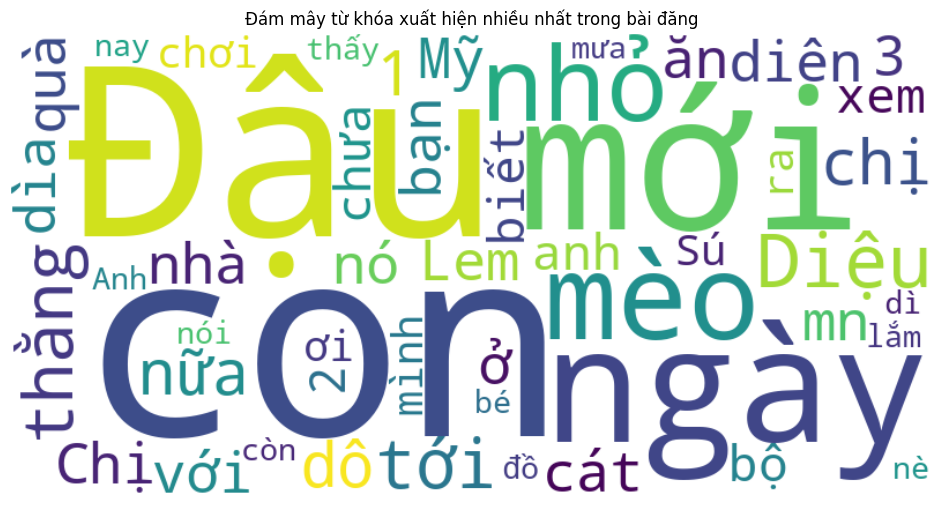

In [130]:
all_text = ' '.join(df['post_text'].astype(str))

words = ViTokenizer.tokenize(all_text).split()

stop_words = set(['và', 'như', 'là', 'một', 'của', 'được', 'mà', 'mấy', 'đi', 'đó', 'này', 'cái', 'cho', 'luôn', 'có', 'nào'])
filtered_words = [word for word in words if word.isalnum() and word not in stop_words]

word_counts = Counter(filtered_words)

# Tạo đám mây từ khóa
wordcloud = WordCloud(width=800, height=400, max_words=50, background_color='white').generate_from_frequencies(word_counts)

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Đám mây từ khóa xuất hiện nhiều nhất trong bài đăng')
plt.show()


## Interact

### Tổng quan

In [ ]:
df1 = df
df1['reactions'] = df['reactions'].apply(lambda x : dict(eval(x)) )
post_df_full_reactions = df['reactions'].apply(pd.Series )

In [ ]:
post_df_full_with_reactions = pd.concat([df1, post_df_full_reactions], axis=1).drop('reactions', axis=1)

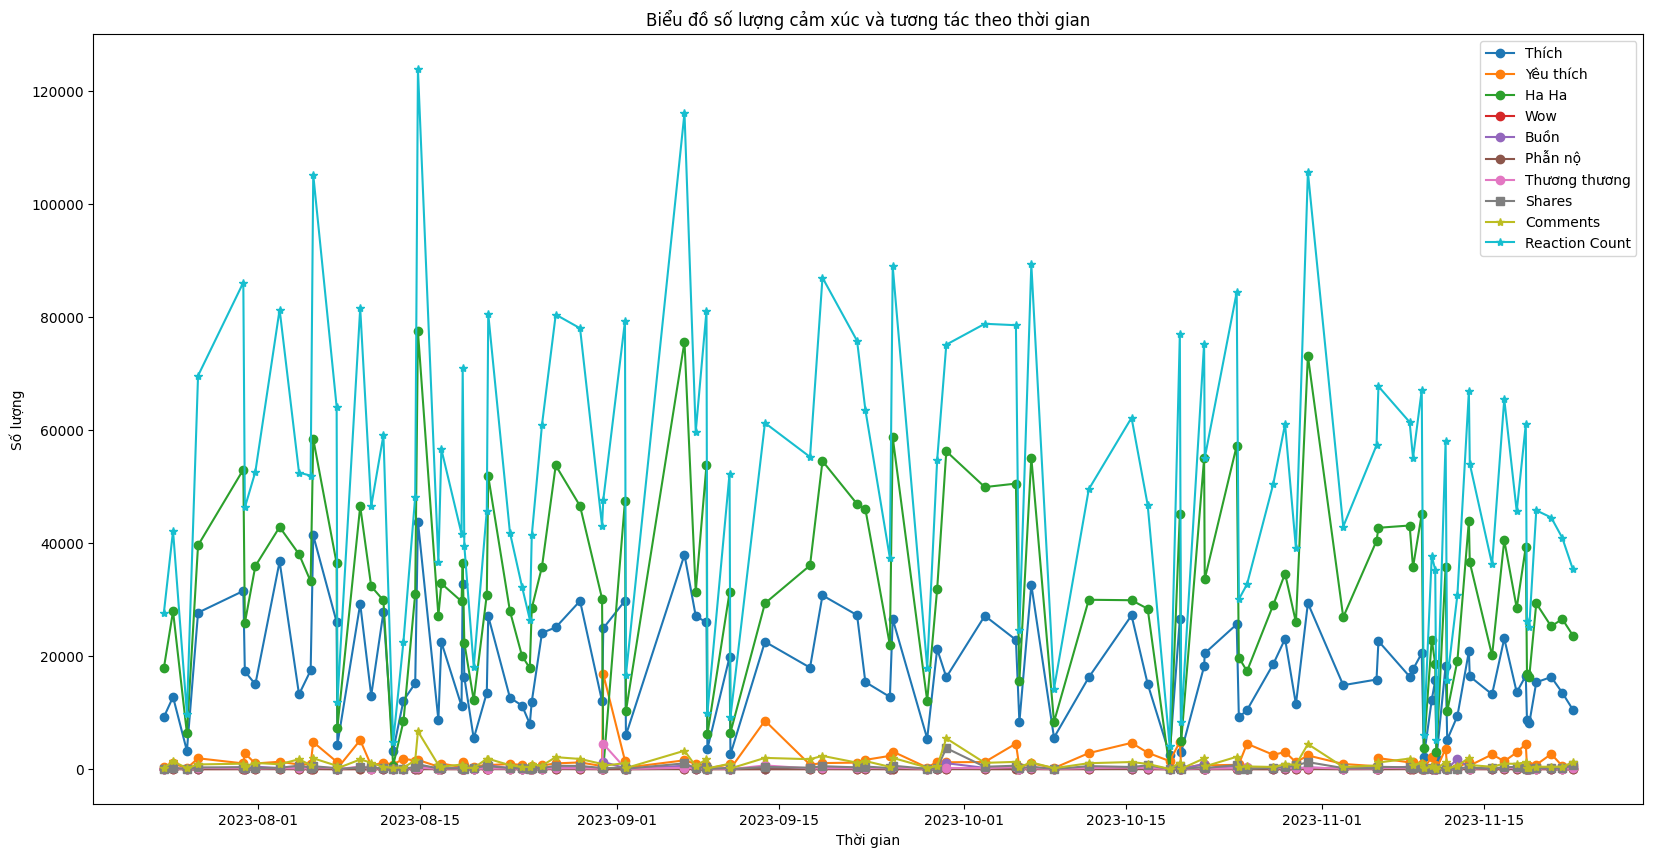

In [124]:
fig, ax = plt.subplots(figsize=(20, 10))

# Vẽ các đường cho từng loại cảm xúc
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['thích'], label="Thích", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['yêu thích'], label="Yêu thích", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['haha'], label="Ha Ha", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['wow'], label="Wow", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['buồn'], label="Buồn", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['phẫn nộ'], label="Phẫn nộ", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['thương thương'], label="Thương thương", marker="o")

# Vẽ đường cho số lượng chia sẻ
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['shares'], label="Shares", marker="s")

# Vẽ đường cho số lượng bình luận
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['comments'], label="Comments", marker="*")

# Vẽ đường cho tổng số lượt tương tác (reaction_count)
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['reaction_count'], label="Reaction Count", marker="*")

# Đặt nhãn và tiêu đề
ax.set_xlabel('Thời gian')
ax.set_ylabel('Số lượng')
ax.set_title('Biểu đồ số lượng cảm xúc và tương tác theo thời gian')

# Hiển thị chú thích
ax.legend()

# Hiển thị biểu đồ
plt.show()

### Reactions

#### Bài viết có lượt reactions lớn nhất

In [105]:
max_interaction_post = df[df['reaction_count'] == df['reaction_count'].max()]
print("Thông tin của bài viết có lượt reactions lớn nhất:")
max_interaction_post

Thông tin của bài viết có lượt reactions lớn nhất:


,post_id,text,post_text,time,timestamp,image,image_lowquality,images,images_description,images_lowquality,...,image_id,image_ids,video_ids,videos,was_live,fetched_time,datetime,hour,date,post_type
80,268364269280802,Outfit của anh 3 Đậu chiến thiệt chớ\n\n#Lazad...,Outfit của anh 3 Đậu chiến thiệt chớ\n\n#Lazad...,2023-08-14 19:27:19,1692016039,NaN,https://scontent.fhan14-4.fna.fbcdn.net/v/t15....,[],[],['https://scontent.fhan14-4.fna.fbcdn.net/v/t1...,...,NaN,[],NaN,NaN,False,2023-11-23 00:10:58.707,2023-08-14 19:27:19,19,2023-08-14,Video


#### Bài viết có lượt reactions nhỏ nhất

In [106]:
min_interaction_post = df[df['reaction_count'] == df['reaction_count'].min()]
print("Thông tin của bài viết có lượt reactions nhỏ nhất:")
min_interaction_post

Thông tin của bài viết có lượt reactions nhỏ nhất:


,post_id,text,post_text,time,timestamp,image,image_lowquality,images,images_description,images_lowquality,...,image_id,image_ids,video_ids,videos,was_live,fetched_time,datetime,hour,date,post_type
36,303990432384852,Một cách để bày tỏ tình iu đến mấy nhỏ 4 chân ...,Một cách để bày tỏ tình iu đến mấy nhỏ 4 chân ...,2023-10-18 19:32:52,1697632372,https://m.facebook.com/photo/view_full_size/?f...,https://scontent.fhan14-2.fna.fbcdn.net/v/t39....,['https://m.facebook.com/photo/view_full_size/...,"[""Có thể là hình ảnh về văn bản cho biết 'CHẠY...",['https://scontent.fhan14-2.fna.fbcdn.net/v/t3...,...,6.503407e+14,['650340670630822'],NaN,NaN,False,2023-11-22 23:33:44.107,2023-10-18 19:32:52,19,2023-10-18,Ảnh


#### Loại reactions

In [127]:

for i in range(0, len(post_df_full_with_reactions['thích'].values), 1):
    if pd.isna(post_df_full_with_reactions['thích'].values[i]):
        post_df_full_with_reactions['thích'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['yêu thích'].values[i]):
        post_df_full_with_reactions['yêu thích'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['haha'].values[i]):
        post_df_full_with_reactions['haha'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['wow'].values[i]):
        post_df_full_with_reactions['wow'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['buồn'].values[i]):
        post_df_full_with_reactions['buồn'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['phẫn nộ'].values[i]):
        post_df_full_with_reactions['phẫn nộ'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['thương thương'].values[i]):
        post_df_full_with_reactions['thương thương'].values[i] = 0

post_df_full_with_reactions[['post_text','thích','yêu thích','haha','wow','buồn','phẫn nộ','thương thương']]

,post_text,thích,yêu thích,haha,wow,buồn,phẫn nộ,thương thương
0,Trừi đánh tránh bữa ăn mà trừi 🥹,10513.0,669.0,23662.0,23.0,349.0,1.0,129.0
1,Bàn cào tuy mới mà cũ tuy cũ mà mới 🥹,13548.0,588.0,26584.0,22.0,145.0,0.0,72.0
2,1 ngày tòn là màu xanh\n\n#pateHappyChoice,16317.0,2686.0,25277.0,18.0,68.0,0.0,178.0
3,Tụ này mà dề thăm trường 20/11 người ta tưởng ...,15386.0,793.0,29351.0,21.0,144.0,1.0,113.0
4,Trước và sau khi thằng Mập đi họp phụ huynh ch...,8105.0,493.0,16337.0,18.0,78.0,0.0,66.0
...,...,...,...,...,...,...,...,...
95,Nỗi lòng chị Diệu,31552.0,1029.0,53033.0,33.0,312.0,2.0,171.0
96,Một ngày ăn dì của mấy con 🐴,27706.0,1936.0,39619.0,20.0,118.0,2.0,237.0
97,Hành trình đi tìm kho báu của Mỹ Diệu 🥲,3255.0,162.0,6365.0,12.0,38.0,0.0,21.0
98,Chú 7 thả dáng,12792.0,1021.0,27964.0,48.0,205.0,0.0,151.0


#### Phần trăm từng loại reactions

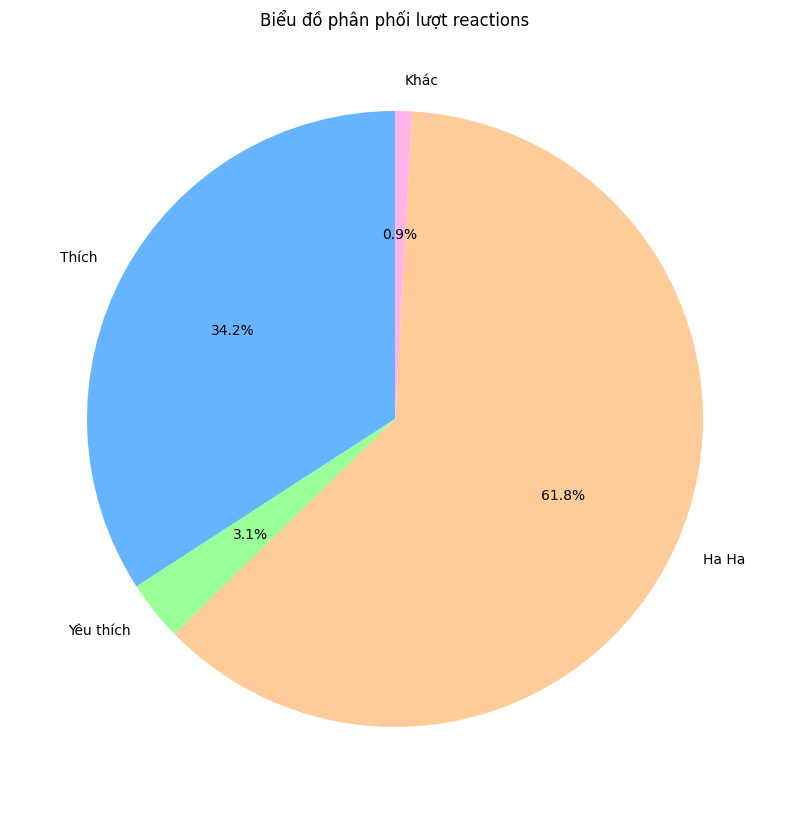

In [149]:
post_df_full_with_reactions['khác'] = post_df_full_with_reactions['wow'] + post_df_full_with_reactions['buồn'] + post_df_full_with_reactions['phẫn nộ'] + post_df_full_with_reactions['thương thương']

total_likes = post_df_full_with_reactions['thích'].sum()
total_loves = post_df_full_with_reactions['yêu thích'].sum()
total_hahas = post_df_full_with_reactions['haha'].sum()
total_others = post_df_full_with_reactions['khác'].sum()

total_interactions = pd.Series({
    'Thích': total_likes,
    'Yêu thích': total_loves,
    'Ha Ha': total_hahas,
    'Khác': total_others
})

# Vẽ biểu đồ
plt.figure(figsize=(10, 10))
plt.pie(total_interactions, labels=total_interactions.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99','#ffcc99','#ffb3e6'])
plt.title('Biểu đồ phân phối lượt reactions')
plt.show()

#### Số lượt reaction theo giờ

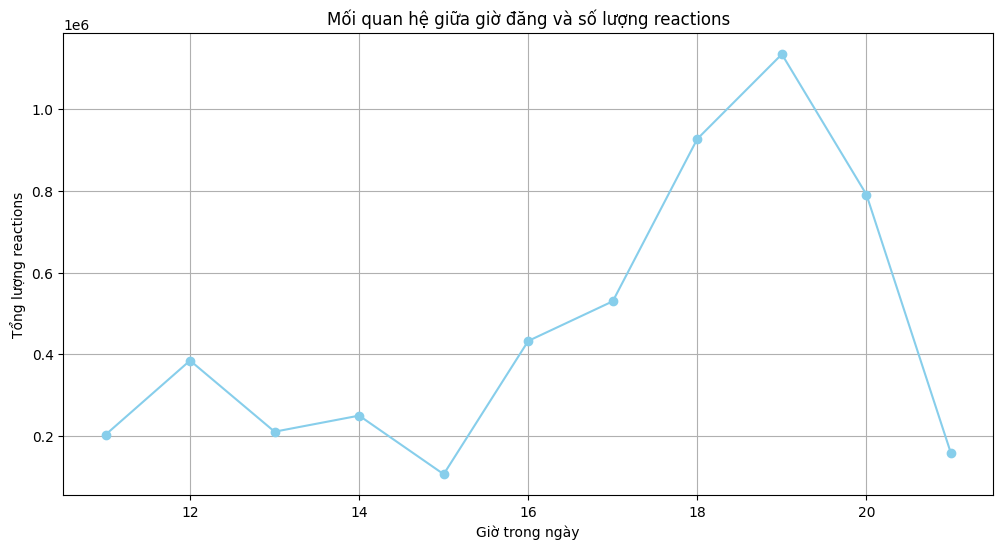

In [107]:
interaction_by_hour = df.groupby('hour')['reaction_count'].sum()

plt.figure(figsize=(12, 6))
plt.plot(interaction_by_hour.index, interaction_by_hour.values, marker='o', linestyle='-', color='skyblue')
plt.title('Mối quan hệ giữa giờ đăng và số lượng reactions')
plt.xlabel('Giờ trong ngày')
plt.ylabel('Tổng lượng reactions')
plt.grid(True)
plt.show()

#### Số lượt reactions theo ngày

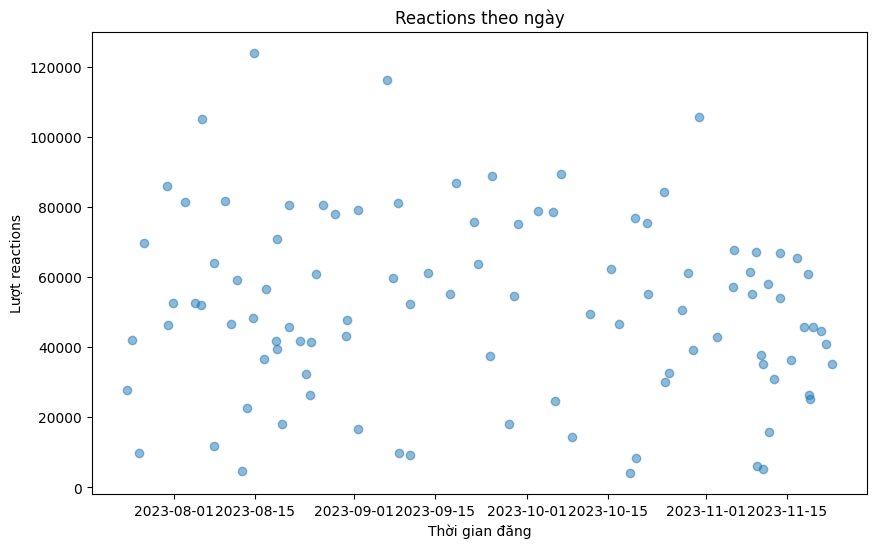

In [137]:
plt.figure(figsize=(10, 6))
plt.scatter(df['time'], df['reaction_count'], alpha=0.5)
plt.title('Reactions theo ngày')
plt.ylabel('Lượt reactions')
plt.xlabel('Thời gian đăng')
plt.show()

#### Tỉ lệ giữa số lượt reactions và giờ đăng

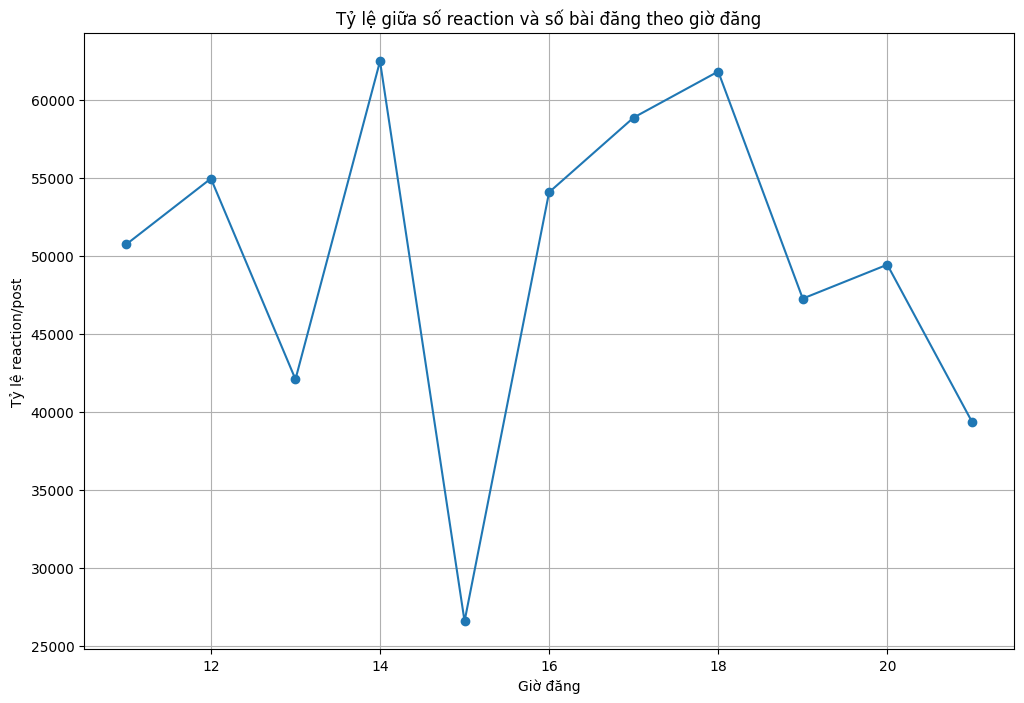

In [34]:
# Tổng hợp dữ liệu theo giờ
df_grouped = df.groupby('hour').agg({
    'reaction_count': 'sum',
    'post_text': 'count'
}).reset_index()

# Tính tỷ lệ
df_grouped['reaction_per_post'] = df_grouped['reaction_count'] / df_grouped['post_text']

# Vẽ biểu đồ đường
plt.figure(figsize=(12, 8))
plt.plot(df_grouped['hour'], df_grouped['reaction_per_post'], marker='o')
plt.title('Tỷ lệ giữa số reaction và số bài đăng theo giờ đăng')
plt.xlabel('Giờ đăng')
plt.ylabel('Tỷ lệ reaction/post')
plt.grid(True)
plt.show()

### Comments

#### Bài đăng có lượt comments lớn nhất

In [139]:
max_comment_post = df[df['comments'] == df['comments'].max()]
print("Thông tin của bài viết có lượt comment lớn nhất:")
max_comment_post

Thông tin của bài viết có lượt comment lớn nhất:


,post_id,text,post_text,time,timestamp,image,image_lowquality,images,images_description,images_lowquality,...,page_id,image_id,image_ids,video_ids,videos,was_live,fetched_time,datetime,hour,date
80,268364269280802,Outfit của anh 3 Đậu chiến thiệt chớ\n\n#Lazad...,Outfit của anh 3 Đậu chiến thiệt chớ\n\n#Lazad...,2023-08-14 19:27:19,1692016039,NaN,https://scontent.fhan14-4.fna.fbcdn.net/v/t15....,[],[],['https://scontent.fhan14-4.fna.fbcdn.net/v/t1...,...,100331869342491,NaN,[],NaN,NaN,False,2023-11-23 00:10:58.707,2023-08-14 19:27:19,19,2023-08-14


#### Bài đăng có lượt comments nhỏ nhất

In [140]:
min_comment_post = df[df['comments'] == df['comments'].min()]
print("Thông tin của bài viết có lượt comment nhỏ nhất:")
min_comment_post

Thông tin của bài viết có lượt comment nhỏ nhất:


,post_id,text,post_text,time,timestamp,image,image_lowquality,images,images_description,images_lowquality,...,page_id,image_id,image_ids,video_ids,videos,was_live,fetched_time,datetime,hour,date
36,303990432384852,Một cách để bày tỏ tình iu đến mấy nhỏ 4 chân ...,Một cách để bày tỏ tình iu đến mấy nhỏ 4 chân ...,2023-10-18 19:32:52,1697632372,https://m.facebook.com/photo/view_full_size/?f...,https://scontent.fhan14-2.fna.fbcdn.net/v/t39....,['https://m.facebook.com/photo/view_full_size/...,"[""Có thể là hình ảnh về văn bản cho biết 'CHẠY...",['https://scontent.fhan14-2.fna.fbcdn.net/v/t3...,...,100331869342491,6.503407e+14,['650340670630822'],NaN,NaN,False,2023-11-22 23:33:44.107,2023-10-18 19:32:52,19,2023-10-18


#### Những người comment nhiều nhất 

In [148]:

# Tạo danh sách tên của tất cả người comment
all_commenters = []
for post in post_list:
    if 'comments_full' in post and len(post['comments_full']) > 0:
        comments_text = [comment['commenter_name'] for comment in post['comments_full']]
        all_commenters.extend(comments_text)

# Đếm số lần xuất hiện của mỗi người comment
commenters_count = Counter(all_commenters)

# Lấy ra những người comment nhiều nhất
top_commenters = commenters_count.most_common(10)

# In ra những người comment nhiều nhất
for commenter, count in top_commenters:
    print(f'{commenter}: {count} lần comment')

Tùng Nguyễn: 22 lần comment
Kenny Sang: 21 lần comment
Vitamin Mèo: 20 lần comment
H'Li Da Nie: 12 lần comment
Thiên Hữu: 11 lần comment
Nguyễn Duy Hội: 11 lần comment
Trần Minh: 8 lần comment
Lê Xuân Tịnh: 8 lần comment
Ngọc Hạ: 7 lần comment
Mai CTran: 7 lần comment


#### Các từ khóa xuất hiện nhiều nhất trong comments

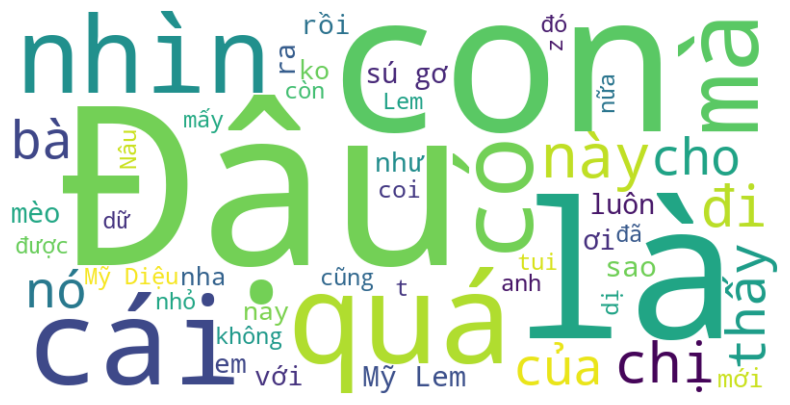

In [134]:
post_list=post_list.tolist()
res = []

for post in post_list:
    if len(post['comments_full']) > 0:
        comments_text = [comment['comment_text'] for comment in post['comments_full']]
        res.extend(comments_text)
# Gộp tất cả các comment thành một chuỗi
comments_combined = ' '.join(res)

# Tách từ tiếng Việt sử dụng thư viện pyvi
words = ViTokenizer.tokenize(comments_combined).split()

stop_words = set(['và', 'như', 'là', 'một', 'của', 'được', 'mà', 'mấy', 'đi', 'đó', 'này', 'cái', 'cho', 'luôn', 'có', 'nào'])
filtered_words = [word for word in words if word.isalnum() and word not in stop_words]

# Tạo đám mây từ khóa
wordcloud = WordCloud(width=800, height=400, max_words=50, background_color='white').generate(comments_combined)

# Hiển thị đám mây từ khóa
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Shares

#### Bài đăng có lượt share lớn nhất

In [141]:
max_share_post = df[df['shares'] == df['shares'].max()]
print("Thông tin của bài viết có lượt share lớn nhất:")
max_comment_post

Thông tin của bài viết có lượt share lớn nhất:


,post_id,text,post_text,time,timestamp,image,image_lowquality,images,images_description,images_lowquality,...,page_id,image_id,image_ids,video_ids,videos,was_live,fetched_time,datetime,hour,date
45,293070086810220,12 con giáp 😚,12 con giáp 😚,2023-09-29 11:57:43,1695963463,https://scontent.fhan14-2.fna.fbcdn.net/v/t39....,https://scontent.fhan14-2.fna.fbcdn.net/v/t39....,['https://scontent.fhan14-2.fna.fbcdn.net/v/t3...,"[""Có thể là hình ảnh về mèo và văn bản cho biế...",['https://scontent.fhan14-2.fna.fbcdn.net/v/t3...,...,100331869342491,NaN,[],[],[],False,2023-11-22 23:42:44.399,2023-09-29 11:57:43,11,2023-09-29


#### Bài đăng có lượt share nhỏ nhất

In [143]:
min_share_post = df[df['shares'] == df['shares'].min()]
print("Thông tin của bài viết có lượt share nhỏ nhất:")
min_comment_post

Thông tin của bài viết có lượt share nhỏ nhất:


,post_id,text,post_text,time,timestamp,image,image_lowquality,images,images_description,images_lowquality,...,page_id,image_id,image_ids,video_ids,videos,was_live,fetched_time,datetime,hour,date
36,303990432384852,Một cách để bày tỏ tình iu đến mấy nhỏ 4 chân ...,Một cách để bày tỏ tình iu đến mấy nhỏ 4 chân ...,2023-10-18 19:32:52,1697632372,https://m.facebook.com/photo/view_full_size/?f...,https://scontent.fhan14-2.fna.fbcdn.net/v/t39....,['https://m.facebook.com/photo/view_full_size/...,"[""Có thể là hình ảnh về văn bản cho biết 'CHẠY...",['https://scontent.fhan14-2.fna.fbcdn.net/v/t3...,...,100331869342491,6.503407e+14,['650340670630822'],NaN,NaN,False,2023-11-22 23:33:44.107,2023-10-18 19:32:52,19,2023-10-18


### Correlate

#### Reactions & Shares

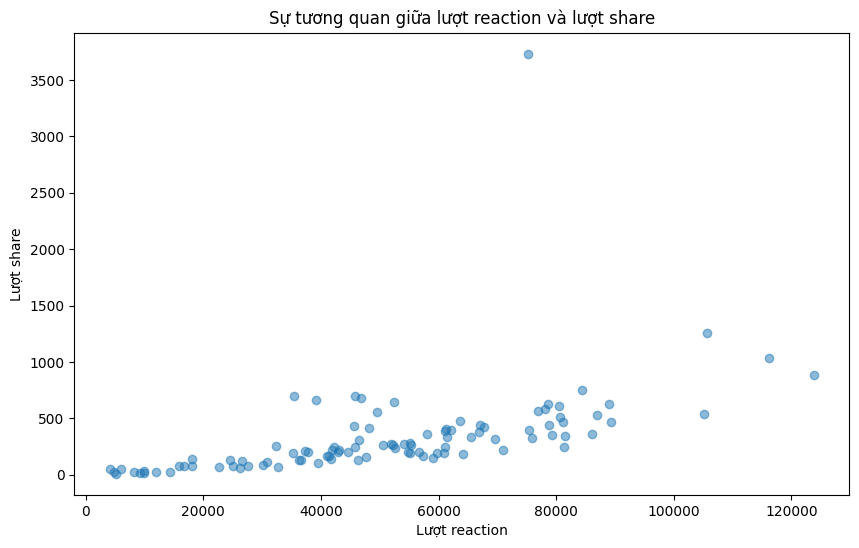

In [9]:
df = df.dropna(subset=['reaction_count', 'shares'])

# Vẽ scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['reaction_count'], df['shares'], alpha=0.5)

# Thiết lập tiêu đề và các đánh dấu trục
plt.title('Sự tương quan giữa lượt reaction và lượt share')
plt.xlabel('Lượt reaction')
plt.ylabel('Lượt share')

# Hiển thị biểu đồ
plt.show()

#### Reactions & Comments

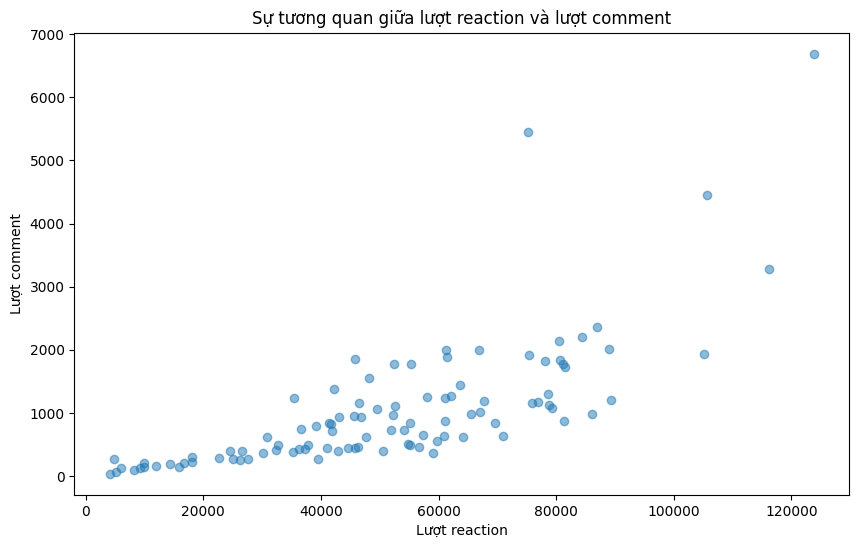

In [132]:
df = df.dropna(subset=['reaction_count', 'comments'])

# Vẽ scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['reaction_count'], df['comments'], alpha=0.5)

# Thiết lập tiêu đề và các đánh dấu trục
plt.title('Sự tương quan giữa lượt reaction và lượt comment')
plt.xlabel('Lượt reaction')
plt.ylabel('Lượt comment')

# Hiển thị biểu đồ
plt.show()

#### Shares & Comments

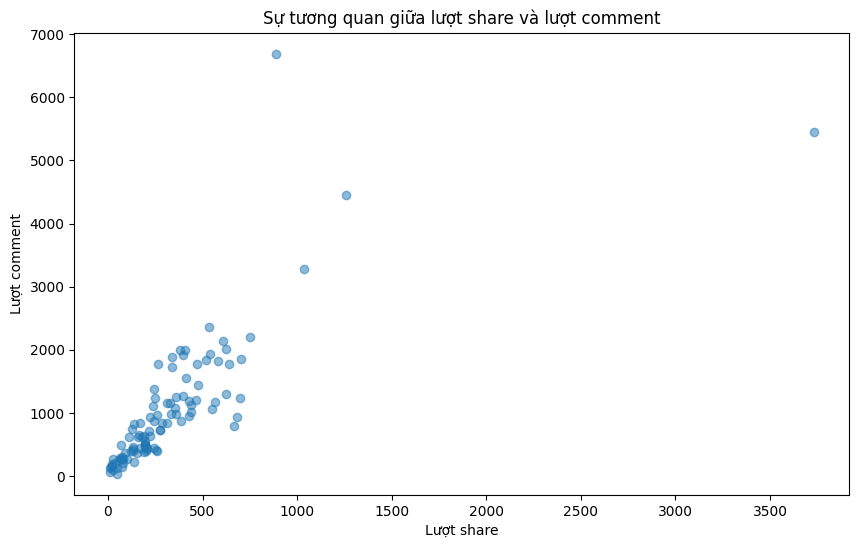

In [144]:
df = df.dropna(subset=['shares', 'comments'])

# Vẽ scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['shares'], df['comments'], alpha=0.5)

# Thiết lập tiêu đề và các đánh dấu trục
plt.title('Sự tương quan giữa lượt share và lượt comment')
plt.xlabel('Lượt share')
plt.ylabel('Lượt comment')

# Hiển thị biểu đồ
plt.show()